# Assignment 2: Getting data from Twitter API

For working on this assignment, the easiest way is to log into the [datahub.berkeley.edu](http://datahub.berkeley.edu). If you have a @berkeley.edu email address, you already have full access to the programming environment hosted on that site. 

## 1. Intro

Twitter collects a *lot* of data. Ranging from tweets themselves, to data about users, to data about likes and other interactions, Twitter basically records everything that happens on their website. Lucky for data scientists like ourselves, Twitter also shares that data with us! In this assignment, we're going to use Twitter's API to analyze retweet statistics, demographics, and some other data too! 

## 2. Importing Libraries

Other people are also interested in analyzing Twitter data, so there's been work done here already. That means other folks have developed useful collections of code — called libraries — which handle a lot of parsing and data management, so that we don't have to. Since these libraries are published online, we have access to all that hard work too! That means we can use code from those libraries to handle all the complicated Twitter models, so we only have to worry about the actual analysis (which is the fun part).

You don't need to worry too much about the code in the next cell. Its purpose is to install libraries that other people have written, so that we have access to them later on.

In [48]:
!pip install tweepy    # This halps us access Twitter data.
!pip install textblob  # This helps us parse text.
!pip install plotly    # This makes it easy to plot graphs.
!pip install nltk      # This is also to parse text.

## 3. Accessing the Data

### Question 1
Follow these instructions to get your keys:
To work on Twitter data, we'll first need two things: a Twitter account, and Twitter keys. Here are the steps to follow:

1. [Create a Twitter account](https://twitter.com).  You can use an existing account if you have one.
1. [Create a Twitter developer account](https://dev.twitter.com/resources/signup).  Attach it to your Twitter account.
1. Once you're logged into your developer account, [create an application for this assignment](https://apps.twitter.com/app/new).  You can call it whatever you want, and you can write any URL when it asks for a web site.
1. On the page for that application, find your Consumer Key and Consumer Secret. Don't lose these!
1. On the same page, create an Access Token. Record the resulting Access Token and Access Token Secret. Don't lose these either!

**Security concern:** DO NOT share your access keys with anyone. They can be used to manage your Twitter account without your permission.

Add your credentials in the cell below. Your program will use them to access Twitter data.

In [49]:
consumer_key = "cuh0rJTiHrh124QZDKpOeDKoz"
consumer_secret = "plwlMe8ZrFNfuDsKj5qkYpyx9VrPlifsr7E5KdwE0Vtc1vINpO"
access_key = "919709372636323840-vw8dxA2KYAkIF9Mbcd9bX1bZ7Bzo9I9"
access_secret = "7UsoejW3ww4z5adqftnLd9NTmXt8bHg5Yf7JmYhE2IVKL"

The next cell will authorize your program to request Twitter data, through the developer account you just set up.

In [50]:
import tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

**Note**: A lot of data scientists like Twitter data. As a result, you can only request data approximately once every 15 minutes to keep Twitter's servers from crashing due to too much activity. Use your requests wisely to avoid unnecessary waiting time.

### Question 2:
[Twitter API](https://dev.twitter.com/overview/api) can be used for retrieving different objects (e.g., tweets). List the other possible objects that can be retrieved by Twitter API.


**Answer:**
1. Users
1. Entities
1. Places

Now that everything is set up, we can use [Twitter's search API](https://dev.twitter.com/rest/reference/get/search/tweets) to find the word "Berkeley". This will give us the same results as using [Twitter's online "search" page](https://twitter.com/search?q=berkeley).

In [51]:
results = tweepy.Cursor(api.search,   # `api.search` specifies we want to perform a search.
                        q='Berkeley', # `q` is the query, or the words we're searching for.
                        result_type='popular') # We'll prioritize more popular results first.

Now `results` is a long list of search results. Since it is actually pretty extensive, let's just take the first ten results. In the next cell we build up a list called `first_ten`, which contains just the first ten tweets we found in `results`.

In [52]:
first_ten = []                  # We start out with an empty list called `first_ten`.
for tweet in results.items(10): # Then, we'll iterate over the first 10 tweets in `results`...
    first_ten.append(tweet)     # And we'll add each of those tweets to `first_ten`.

Now lets have a peek at what the data looks like. 

In [53]:
print(first_ten)

[Status(_api=<tweepy.api.API object at 0x7fbd07feac50>, _json={'created_at': 'Sun Oct 15 01:55:00 +0000 2017', 'id': 919381060928004096, 'id_str': '919381060928004096', 'text': 'JW revealed Berkeley mayor assured Mexican govt his #SanctuaryCity will still provide safe space for illegal aliens.\nhttps://t.co/shsqbzDxzG', 'truncated': False, 'entities': {'hashtags': [{'text': 'SanctuaryCity', 'indices': [52, 66]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/shsqbzDxzG', 'expanded_url': 'http://jwatch.us/U9iTP8', 'display_url': 'jwatch.us/U9iTP8', 'indices': [117, 140]}]}, 'metadata': {'result_type': 'popular', 'iso_language_code': 'en'}, 'source': '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 18247062, 'id_str': '18247062', 'name': 'Judicial Watch 🔎',

## 4. Exploring the Dataset

Twitter gives us a lot of information about each tweet, not just its text. You can read about all the details [here](https://dev.twitter.com/overview/api/tweets). Let's look at one tweet to get a sense of the information we have available. We can access just the first tweet in our list by indexing into it. Note, the first index in the list is actually 0, not 1, so we will actually say `first_ten[0]` to see the first tweet in our list of ten tweets.

In [74]:
print(first_ten[9]) # Try changing this to any number 0-9, to see other tweets in the list.

Status(_api=<tweepy.api.API object at 0x7fbd07feac50>, _json={'created_at': 'Sat Oct 14 15:15:11 +0000 2017', 'id': 919220043879190528, 'id_str': '919220043879190528', 'text': 'REPLAY: YAF’s Fred Allen Lecture with @benshapiro at UC Berkeley #YAFonCampus #BenAtBerkeley https://t.co/iifaVJU9ZU https://t.co/ZVusv8v9Hy', 'truncated': False, 'entities': {'hashtags': [{'text': 'YAFonCampus', 'indices': [65, 77]}, {'text': 'BenAtBerkeley', 'indices': [78, 92]}], 'symbols': [], 'user_mentions': [{'screen_name': 'benshapiro', 'name': 'Ben Shapiro', 'id': 17995040, 'id_str': '17995040', 'indices': [38, 49]}], 'urls': [{'url': 'https://t.co/iifaVJU9ZU', 'expanded_url': 'http://bit.ly/2wTcmPH', 'display_url': 'bit.ly/2wTcmPH', 'indices': [93, 116]}], 'media': [{'id': 919220040641208320, 'id_str': '919220040641208320', 'indices': [117, 140], 'media_url': 'http://pbs.twimg.com/media/DMG5wbjW4AAdkpa.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DMG5wbjW4AAdkpa.jpg', 'url': 'https://t.co/ZVus

In [55]:
print(first_ten[0].text) # Try this and inspect what it does

JW revealed Berkeley mayor assured Mexican govt his #SanctuaryCity will still provide safe space for illegal aliens.
https://t.co/shsqbzDxzG


In [56]:
print(first_ten[0].created_at) # Try this and inspect what it does 

2017-10-15 01:55:00


### Question 3:
Which field contains each of the following attributes:
1. The tweet's text?
1. The time when the tweet was posted?
1. The geographic location of the tweet?
1. The source (device and app) where the tweet was written?

**Answer:**
1. text
1. created_at
1. coordinates
1. source

## 5. Analyzing the Dataset

It's time to do analysis! Let's start out by getting a list, where each entry corresponds to how many retweets we got in the first 

In [57]:
retweet_counts = []                      # We start with an empty list called `retweet_counts`.
for tweet in first_ten:                  # Then, we iterate over the tweets in `first_ten`...
    retweet_count = tweet.retweet_count  # And, for each tweet, get the number of retweets...
    retweet_counts.append(retweet_count) # And append that number to our list `retweet_counts`.
    
print(retweet_counts)

[454, 118, 123, 106, 95, 58, 20, 20, 17, 35]


Let's try and draw it:

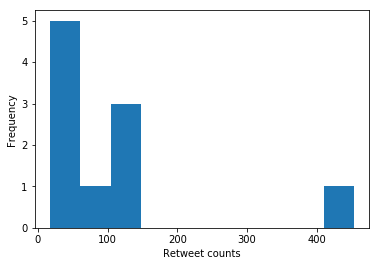

In [58]:
import matplotlib.pyplot as plt
plt.hist(retweet_counts)
plt.xlabel("Retweet counts")
plt.ylabel("Frequency")
plt.show()

### Question 4
Twitter search api provides three modes (check out this [guide](https://dev.twitter.com/rest/reference/get/search/tweets)) for the result_type: mix, recent, and popular. In the previous code, we retrieved the popular tweets. 
Now it is your turn to retrieve recent 100 tweets and assign them to a new variable (e.g., results_recent100), then plot a histogram for the retweet count of the recent 100 tweets. You can follow our example code if you wish. 


**Answer**


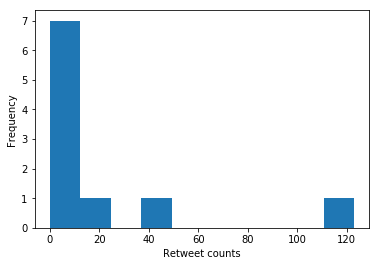

In [59]:
results_recent100 = tweepy.Cursor(api.search, q='Berkeley', result_type='recent')
first_ten_recent100 = []
for tweet in results_recent100.items(10):
    first_ten_recent100.append(tweet)
retweet_counts_recent100 = []
for tweet in first_ten_recent100:
    retweet_count_recent100 = tweet.retweet_count
    retweet_counts_recent100.append(retweet_count_recent100)

import matplotlib.pyplot as plt
plt.hist(retweet_counts_recent100)
plt.xlabel("Retweet counts")
plt.ylabel("Frequency")
plt.show()

### Question 5
Compare and contrast between the two histograms for retweet counts of recent and popular 100 tweets that returns from searching the word Berkeley. 

**Answer**: 


Retweet counts of first 10 of recent 100 tweets are very segregated with most have retweet counts less than couple hundreds and some that are equal to 98102. On the other hand, retweet counts of first 10 of popular 100 tweets are very close to each other around hundreds.

## Users
Instead of searching for tweets, you can use Twitter APIs to get details about specific user account. It includes user’s timeline, followers, etc.

Get the latest 10 tweets from an account that interests you (e.g.,  UCBerkeley) twitter account using the following code.

In [66]:
user_results = api.user_timeline(screen_name='UCBerkeley', count=10)
print(user_results)
user_results_tweets = []           # We start with an empty list called user_results_tweets

for t in user_results:             #Then, we iterate over the tweets in user_results
    user_results_tweets.append(t)#And we'll add each of those tweets to user_results_tweets 
    print(t)

[Status(_api=<tweepy.api.API object at 0x7fbd07feac50>, _json={'created_at': 'Sun Oct 15 22:02:01 +0000 2017', 'id': 919684816559206401, 'id_str': '919684816559206401', 'text': 'ICYMI: 3 Berkeley alums win MacArthur ‘genius’ awards https://t.co/Zx97c1R4bN @macfound #MacFellow #GoBears https://t.co/Kz9WAeSTbr', 'truncated': False, 'entities': {'hashtags': [{'text': 'MacFellow', 'indices': [88, 98]}, {'text': 'GoBears', 'indices': [99, 107]}], 'symbols': [], 'user_mentions': [{'screen_name': 'macfound', 'name': 'MacArthur Foundation', 'id': 14275261, 'id_str': '14275261', 'indices': [78, 87]}], 'urls': [{'url': 'https://t.co/Zx97c1R4bN', 'expanded_url': 'http://bit.ly/2hC3CXO', 'display_url': 'bit.ly/2hC3CXO', 'indices': [54, 77]}], 'media': [{'id': 919684813354819584, 'id_str': '919684813354819584', 'indices': [108, 131], 'media_url': 'http://pbs.twimg.com/media/DMNgdw1V4AAzK9-.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DMNgdw1V4AAzK9-.jpg', 'url': 'https://t.co/Kz9WAeSTbr', 

In [68]:
#Let's look at one tweet
print(user_results_tweets[0])
print("Aspen")

Status(_api=<tweepy.api.API object at 0x7fbd07feac50>, _json={'created_at': 'Sun Oct 15 22:02:01 +0000 2017', 'id': 919684816559206401, 'id_str': '919684816559206401', 'text': 'ICYMI: 3 Berkeley alums win MacArthur ‘genius’ awards https://t.co/Zx97c1R4bN @macfound #MacFellow #GoBears https://t.co/Kz9WAeSTbr', 'truncated': False, 'entities': {'hashtags': [{'text': 'MacFellow', 'indices': [88, 98]}, {'text': 'GoBears', 'indices': [99, 107]}], 'symbols': [], 'user_mentions': [{'screen_name': 'macfound', 'name': 'MacArthur Foundation', 'id': 14275261, 'id_str': '14275261', 'indices': [78, 87]}], 'urls': [{'url': 'https://t.co/Zx97c1R4bN', 'expanded_url': 'http://bit.ly/2hC3CXO', 'display_url': 'bit.ly/2hC3CXO', 'indices': [54, 77]}], 'media': [{'id': 919684813354819584, 'id_str': '919684813354819584', 'indices': [108, 131], 'media_url': 'http://pbs.twimg.com/media/DMNgdw1V4AAzK9-.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DMNgdw1V4AAzK9-.jpg', 'url': 'https://t.co/Kz9WAeSTbr', '

In [69]:
#print the text of the first 10 tweets
for tweet in user_results_tweets:
    print(tweet.created_at.strftime("%Y-%b-%d %H:%M"))
    print(tweet.text)
    print()

2017-Oct-15 22:02
ICYMI: 3 Berkeley alums win MacArthur ‘genius’ awards https://t.co/Zx97c1R4bN @macfound #MacFellow #GoBears https://t.co/Kz9WAeSTbr

2017-Oct-15 19:04
Physics postdoc &amp;amp; mentor awarded prestigious @LOrealUSA fellowship https://t.co/N6KAjwHqoP https://t.co/x4HU0LBeju

2017-Oct-15 18:04
BLOG: Summer of #Love language — still compelling after all these years https://t.co/bsjaOd3jjA @GeoffNunberg… https://t.co/Hh83HQtK65

2017-Oct-15 17:03
Sailing an ocean of challenges to stage 'Metamorphoses' https://t.co/VlDny8vd0S #theater #water https://t.co/QMNGky54lu

2017-Oct-15 16:58
RT @dan_kammen: Food delivery drones on campus  (already very, very @starwars) now distributing free particulate masks @CAL_FIRE https://t.…

2017-Oct-15 16:05
Shanka Sastry (MS '79, MS '80, PhD '81) will step down as engineering dean https://t.co/XMj34icLav https://t.co/JP4DCIyvfK

2017-Oct-15 07:30
#CRISPR-Gold fixes Duchenne muscular dystrophy mutation in mice https://t.co/hGrIoGX970 #InThi

### Question 6

Look at the text of retrieved tweets and compare them to the latest 10 tweets of the [web interface](https://twitter.com/UCBerkeley) for the same user. Do you see any difference? 

**Answer**: 

1. The pinned tweet is not among the first ten tweets. 
2. URIs linked to outside websites are different. 
3. No pictures are in the texts but given URIs to link to the tweets, which include pictures.

Get a list of a followers for UCBerkeley.

In [71]:
followers_list = []
followers_results = api.followers(screen_name='UCBerkeley', count=200)
for f in followers_results:
    followers_list.append(f)
for f in followers_list:
    print(f.name)

Nicholas Larus-Stone
Robbie Edwards
The Real Safahri
Amareah Watkins
Nora Spence
Zinda yem
Emil Faena
D'Maris Coffman
Jorge Senchi
Donald Frank Travins
Cavanshir Manafov
Andy Si
Uriel Rodriguez
Natalia Capovilla
Hadild18
RedSnow Robotics
Kkkk
PloufSF
Bonny
Marty
Joseph Steinberg
Gabriel Rodrigues
Glenna
Rock Tree
Ivan Uhlianytsia
Meagan.
shaun
Laura Martin
Florencia
💕ᴄʜʀɪꜱᴛɪɴᴀ💕
Caleb Dyess
San Diego State
Yocelyn 💎❄❄
Roseville High
Niel Caldwell
Fernando Perla
Am
Ghandi Makhzoum
おすし かっちん
amber
Nik Jin
Daniel Resendiz
luwarrior
Perman Jorayev
Er Mihir Ranjan Sahu
DisRE GANG
Manan Patel
頹廢文人Blues
Alexis Augusto
William Fong
Kathy Wade
Exam Testing
J. M. Brenna
XiaoyiHao
Hugh YT Lee
Tournesol
Taylor Fallin
Hakeem J. Jefferson
任鹏举
Sherlock
Amir Zamir
Perceptor The Sight
みんみん(EMIKO)
Vicky Shi
ash
Min-ju Kim
Kevin Teas
Nsjs
nachi mori
Moon One Base
ㅤ🄸🄰🄽𓅪
Mminci
爆上げの人生で
Emmanuela Greenblatt
Erich Reimer
Marco
Preetam sarma
Lucho González
UCR GSOE
Elsa Ortiz
Jose
g
SW4T
Don Thomas Mallillin
Jo

There’s a limit on how many users can be returned by one request. If you need more, please read [using cursors to navigate collections](https://dev.twitter.com/overview/api/cursoring).

### Extra Credit Question 
We saw how to use Twitter API to search for tweets. The [Search API](https://dev.twitter.com/rest/public/search) has an option to filter the query results by geo location. The parameter value is specified by ”latitude,longitude,radius” (check out the documentation of API  for more information). Compare the top 10 popular tweets text that contain the word 'berkeley' from four geo locations: Berkeley, Kansas City, New York, and Barcelona Spain.


**Answer:**

In [72]:
pop_tweets_BC = tweepy.Cursor(api.search, q='Berkeley', result_type='popular', geo_code="37.871593,-122.272747")
pop_tweets_KC = tweepy.Cursor(api.search, q='Berkeley', result_type='popular', geo_code="39.099727, -94.578567")
pop_tweets_NY = tweepy.Cursor(api.search, q='Berkeley', result_type='popular', geo_code="40.712784, -74.005941")
pop_tweets_BS = tweepy.Cursor(api.search, q='Berkeley', result_type='popular', geo_code="41.385064, -2.173403")

top10BC = []
top10KC = []
top10NY = []
top10BS = []

for tweet in pop_tweets_BC.items(10):
    top10BC.append(tweet)
for tweet in pop_tweets_KC.items(10):
    top10KC.append(tweet)
for tweet in pop_tweets_NY.items(10):
    top10NY.append(tweet)
for tweet in pop_tweets_BS.items(10):
    top10BS.append(tweet)

print(len(top10BC))
print(len(top10KC))
print(len(top10NY))
print(len(top10BS))



10
10
10
10


### Extra Credit Question
Based on profile_location in the follower data, Compare between the followers of Donald Trump and Hillary Clinton in terms of their locations. We are curious as to whether or not there is a difference locationally between Clinton followers and Trump followers (*note following does not necessarily mean supporting :-)*)  

We can do this by seeing where their respective lists have commonality.  Make a list of similar places!  

Advanced (optional): Make your implementation faster for finding the similar places! Think about changing data structure.

**Answer:**

In [101]:
users_trump_followers = api.followers(screen_name="realDonaldTrump", count=100)
names_followers_trump = []
for follower in users_trump_followers:
    if follower.location:
        names_followers_trump.append(follower.location)
        
print("Trump's followers: ")
for f in names_followers_trump:
    print(f)
    
users_clinton_followers = api.followers(screen_name="HillaryClinton", count=100)
names_followers_clinton = []
for follower in users_clinton_followers:
    if follower.location:
        names_followers_clinton.append(follower.location)
        
print("Hillary's followers: ")
for f in names_followers_clinton:
    print(f)
    
similar_cities = []
for follower_c in names_followers_clinton:
    for follower_t in names_followers_trump:
       if follower_c == follower_t:
        similar_cities.append(follower_c)
print(similar_cities)
        
        
        


        


RateLimitError: [{'message': 'Rate limit exceeded', 'code': 88}]

### Submitting the assignment

- Delete your Twitter API credentials, ie. re-assign `consumer_key`, `consumer_secret`, `access_key`, and `access_secret` to empty strings so that we won't see your credentials when you save and sumbit it.
- Save this jupyter notebook as a pdf. Click File, Download as, PDF via LaTex (.pdf).
- Upload the pdf file into bcourses under Assignment 2.